In [2]:
## K-Means Clustering - Applying the KMeans understanding on a dataset.
# Import Numpy, Pandas libraries and KMeans, Scaler and Imputer objects from Sklearn
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the Dataframe using read_csv and save it as Pandas dataframe
cereals = pd.read_csv('input/Cereals.csv')
cereals.shape

(77, 14)

In [4]:
# Understand the dimensions and observe the data using head and tail functions
cereals.head(10)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
9,Bran_Flakes,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813


In [5]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [6]:
cereals.describe(include='object')

,name
count,77
unique,77
top,Almond_Delight
freq,1


In [7]:
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   calories  77 non-null     int64  
 2   protein   77 non-null     int64  
 3   fat       77 non-null     int64  
 4   sodium    77 non-null     int64  
 5   fiber     77 non-null     float64
 6   carbo     76 non-null     float64
 7   sugars    76 non-null     float64
 8   potass    75 non-null     float64
 9   vitamins  77 non-null     int64  
 10  shelf     77 non-null     int64  
 11  weight    77 non-null     float64
 12  cups      77 non-null     float64
 13  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(1)
memory usage: 8.5+ KB


In [8]:
# Aggregate the columns ‘name’ shelf’ and ‘rating’ into one single column and name is as ‘label’.
# 100%_Bran (3 - 68.4)
cereals['label'] = cereals['name'] + ' (' + cereals['shelf'].astype(str) + ' - ' + round(cereals['rating'], 2).astype(str) +')'
cereals.drop(['name', 'shelf', 'rating'], axis=1, inplace=True)
cereals.head(1)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33,100%_Bran (3 - 68.4)


In [9]:
# To ensure the newly created label field is unique across along the dataframe, use the value_counts method. (this is one way, there can be a better way).
print('unique values: ',cereals['label'].nunique())
cereals['label'].value_counts

unique values:  77


<bound method IndexOpsMixin.value_counts of 0                     100%_Bran (3 - 68.4)
1            100%_Natural_Bran (3 - 33.98)
2                     All-Bran (3 - 59.43)
3     All-Bran_with_Extra_Fiber (3 - 93.7)
4               Almond_Delight (3 - 34.38)
                      ...                 
72                     Triples (3 - 39.11)
73                        Trix (2 - 27.75)
74                  Wheat_Chex (1 - 49.79)
75                    Wheaties (1 - 51.59)
76         Wheaties_Honey_Gold (1 - 36.19)
Name: label, Length: 77, dtype: object>

In [10]:
# To continue with clustering, remove the ‘label’ column and save it separately
cereals_label = cereals['label']
cereals.drop(['label'], axis=1, inplace=True)
cereals.head(1)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33


In [11]:
# Check the null values in each of the columns
cereals.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
weight      0
cups        0
dtype: int64

In [12]:
# To ‘Impute’ the null values, initialize the ‘Imputer’ object with ‘mean’ as the imputation
# strategy. Then, use the Imputer object to impute the null values on the data frame
# from sklearn.impute import SimpleImputer # already imported in the import section
na_imputer = SimpleImputer(verbose=5)
na_imputer.fit(cereals)
cereals = pd.DataFrame(na_imputer.transform(cereals), columns=cereals.columns, index=cereals.index)
cereals.head()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,1.0,0.33
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,1.0,1.00
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,1.0,0.33
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,1.0,0.50
4,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,1.0,0.75


In [13]:
# Check the null values again.
cereals.isna().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
weight      0
cups        0
dtype: int64

In [14]:
# Standardize the data : Since clustering is based on distance between the elements, data is very sensitive to scale.
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cereals)
scaled_data = pd.DataFrame(scaler.transform(cereals), columns=cereals.columns, index=cereals.index)
scaled_data.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.542013,-0.237495,2.627053,-0.14627,-0.198067,-2.123870
1,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.764055,0.225316,0.526376,-1.27255,-0.198067,0.774053
2,-1.905397,1.337319,-0.012988,1.204578,2.892113,-2.023374,-0.468901,3.206550,-0.14627,-0.198067,-2.123870
3,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.764055,-1.625929,3.351425,-0.14627,-0.198067,-1.388576
4,0.161019,-0.501495,0.987096,0.484170,-0.486498,-0.208138,0.225316,0.000000,-0.14627,-0.198067,-0.307262


In [15]:
grid_search = GridSearchCV(estimator=KMeans(), param_grid={'n_clusters':list(range(2,10))}, verbose=10, n_jobs=-1)
# estimator = Algo
# param_grid = dict of parameter settings to try as values
# verbose = logger level
# n_jobs = number of processors to use in parallel; -1 to unleash all your processors
grid_search.fit(scaled_data)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  22 out of  40 | elapsed:    1.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:    1.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  32 out of  40 | elapsed:    2.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  37 out of  40 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=8, n_init=10,
                              n_jobs=None, precompute_distances='auto',
                              random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [16]:
grid_search.best_estimator_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
cereals['Category'] = grid_search.predict(scaled_data)
cereals

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,Category
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,1.0,0.33,1
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,1.0,1.00,7
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,1.0,0.33,1
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,1.0,0.50,1
4,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,1.0,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.000000,25.0,1.0,0.75,6
73,110.0,1.0,1.0,140.0,0.0,13.0,12.0,25.000000,25.0,1.0,1.00,8
74,100.0,3.0,1.0,230.0,3.0,17.0,3.0,115.000000,25.0,1.0,0.67,0
75,100.0,3.0,1.0,200.0,3.0,17.0,3.0,110.000000,25.0,1.0,1.00,0


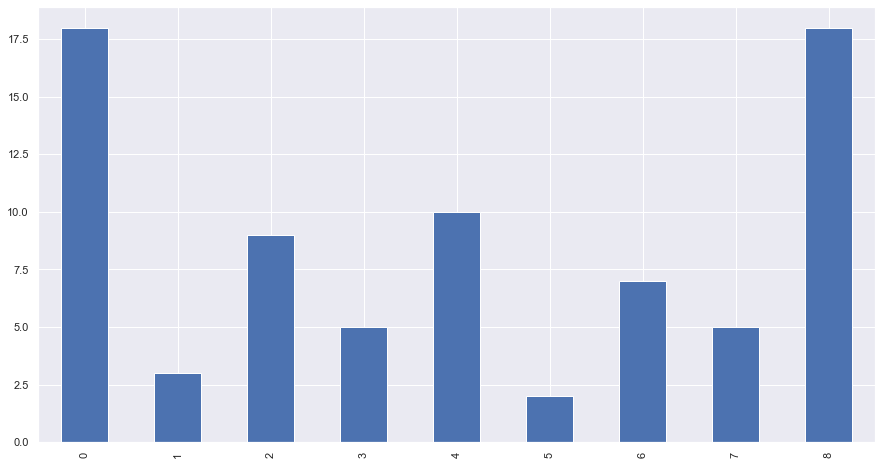

In [18]:
sns.set()
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
cereals.Category.value_counts(sort=False).plot(kind='bar')
plt.show()

In [19]:
grid_search.best_estimator_.cluster_centers_

array([[-0.18338325,  0.21359962,  0.2648131 ,  0.1706594 ,  0.14699152,
        -0.208138  , -0.21178349,  0.15104483, -0.14627013, -0.19806746,
        -0.69413221],
       [-2.24979938,  1.33731939, -0.34634956,  0.20401161,  3.73676565,
        -2.10981415, -0.77744163,  3.06167606, -0.14627013, -0.19806746,
        -1.87877244],
       [ 1.25162795,  0.41791231,  0.43149382,  0.4174658 ,  0.71009334,
         0.06558811,  0.94524452,  1.1944078 ,  0.22915654,  2.14312471,
        -0.49949558],
       [ 0.26434025,  0.05014948, -0.21300498,  0.62825181, -0.31756749,
         1.03659548, -0.51518194, -0.42979364,  3.23256986,  0.20327977,
         0.55778983],
       [-0.66554701,  0.50985302, -0.91306402, -1.32285288,  0.06252624,
         0.56982042, -1.02427427,  0.0101412 , -0.59678213, -0.31178251,
         0.1858176 ],
       [-2.93860476, -0.96119831, -1.01307245, -1.91718939, -0.69766122,
        -0.85643669, -1.62592883, -0.9585847 , -1.27255013, -3.54262772,
         0.774

In [20]:
grid_search.best_estimator_.labels_

array([1, 7, 1, 1, 0, 8, 8, 2, 0, 0, 8, 7, 8, 0, 8, 6, 6, 8, 8, 0, 4, 6,
       0, 0, 8, 8, 4, 2, 2, 8, 8, 8, 0, 0, 0, 8, 0, 8, 3, 3, 6, 0, 8, 4,
       7, 7, 2, 0, 8, 2, 4, 2, 2, 3, 5, 5, 0, 7, 2, 0, 4, 6, 6, 4, 4, 4,
       8, 4, 4, 3, 2, 3, 6, 8, 0, 0, 0], dtype=int32)

In [21]:
grid_search.best_estimator_.inertia_

255.40599927369556

In [22]:
##  Identify the best number of clusters for the data
# Create an empty dictionary call ‘wss’. Now, Run a for loop to change the number of clusters and apply KMeans for each of them.
wss= {}
for k in range(2, 21):
    kmeans_loop = KMeans(n_clusters=k,n_init=30,n_jobs=-1,random_state=1000,verbose=0).fit(scaled_data)
    clusters = kmeans_loop.labels_
    labels = kmeans_loop.predict(scaled_data)
    print('silhouette_score(scaled_cereals, labels):', silhouette_score(scaled_data, labels))
    wss[k] = kmeans_loop.inertia_

silhouette_score(scaled_cereals, labels): 0.21735076008649726
silhouette_score(scaled_cereals, labels): 0.17149087598542434
silhouette_score(scaled_cereals, labels): 0.20839328452574316
silhouette_score(scaled_cereals, labels): 0.2501020816861865
silhouette_score(scaled_cereals, labels): 0.2482984792570507
silhouette_score(scaled_cereals, labels): 0.292608536591621
silhouette_score(scaled_cereals, labels): 0.3006272555499242
silhouette_score(scaled_cereals, labels): 0.3144268815290721
silhouette_score(scaled_cereals, labels): 0.26681952502197026
silhouette_score(scaled_cereals, labels): 0.2867834840131613
silhouette_score(scaled_cereals, labels): 0.3191244628132775
silhouette_score(scaled_cereals, labels): 0.30315722519847543
silhouette_score(scaled_cereals, labels): 0.3120528411876249
silhouette_score(scaled_cereals, labels): 0.3285853178626663
silhouette_score(scaled_cereals, labels): 0.3254449337634043
silhouette_score(scaled_cereals, labels): 0.31936692770977276
silhouette_score(sc

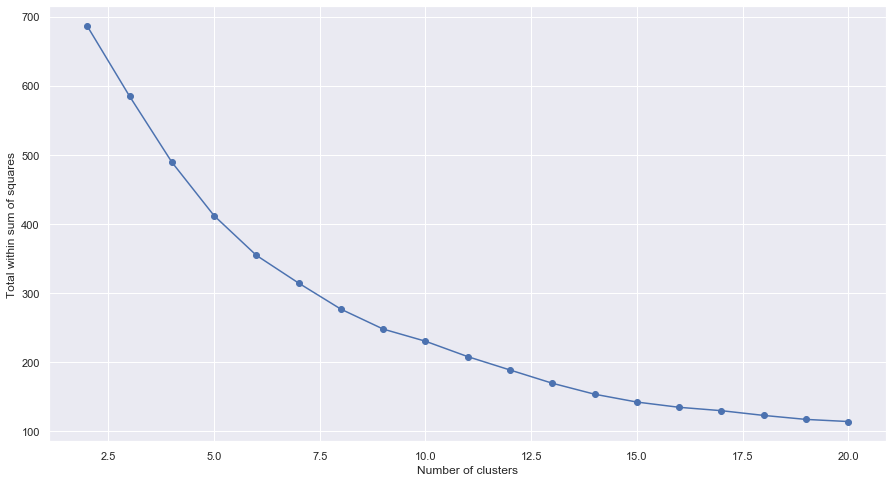

In [23]:
# Plot the scree plot for the above data (it is just the line plot between ‘number of clusters’ and ‘wss’)
sns.set()
plt.figure(figsize=(15,8))
plt.plot(list(wss.keys()),list(wss.values()) ,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.show()

In [24]:
# From Scree plot and Silhouette scores, identify the best value of ‘K’. Re-build the elbow
# plot with preferred value of k. This should be your final model.
# Let's choose cluster size of 8 and build the model again
best_kmeans = KMeans(n_clusters=9, random_state=1240)
best_kmeans.fit(scaled_data)
best_kmeans_labels = best_kmeans.predict(scaled_data)

In [25]:
kmeans_results = pd.DataFrame({"label":cereals_label,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head()

,label,kmeans_cluster
0,100%_Bran (3 - 68.4),7
1,100%_Natural_Bran (3 - 33.98),1
2,All-Bran (3 - 59.43),7
3,All-Bran_with_Extra_Fiber (3 - 93.7),7
4,Almond_Delight (3 - 34.38),3


In [26]:
## Post-processing
# Now let's add the cluster number to the original data.
cereals = pd.read_csv("input/Cereals.csv")
cereals['label'] = cereals['name']+ ' (' +cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)
final_cluster_data = pd.merge(cereals, kmeans_results, on='label')
final_cluster_data.head(10)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label,kmeans_cluster
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.00,0.33,100%_Bran (3 - 68.4),7
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.00,1.00,100%_Natural_Bran (3 - 33.98),1
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.00,0.33,All-Bran (3 - 59.43),7
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.00,0.50,All-Bran_with_Extra_Fiber (3 - 93.7),7
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.00,0.75,Almond_Delight (3 - 34.38),3
5,110,2,2,180,1.5,10.5,10.0,70.0,25,1.00,0.75,Apple_Cinnamon_Cheerios (1 - 29.51),3
6,110,2,0,125,1.0,11.0,14.0,30.0,25,1.00,1.00,Apple_Jacks (2 - 33.17),3
7,130,3,2,210,2.0,18.0,8.0,100.0,25,1.33,0.75,Basic_4 (3 - 37.04),0
8,90,2,1,200,4.0,15.0,6.0,125.0,25,1.00,0.67,Bran_Chex (1 - 49.12),6
9,90,3,0,210,5.0,13.0,5.0,190.0,25,1.00,0.67,Bran_Flakes (3 - 53.31),6


In [27]:
# We can check the number of data points in each cluster with ‘value_counts’ function
final_cluster_data.kmeans_cluster.value_counts()

3    21
6    13
1     9
0     9
4     8
2     7
5     5
7     3
8     2
Name: kmeans_cluster, dtype: int64

In [28]:
# To really understand how clustering has helped in segmenting the data
# Let us look at the centers at each of the clusters in the original scale of the data
final_cluster_data.groupby("kmeans_cluster").mean()


# Can you infer anything from each of the cluster centers?? Can you give names to the clusters?
# Observation : Cluster 4 seems to have a good balace with, almost avg protien, minimal sugars, and relatively good carbos + fiber

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
kmeans_cluster,,,,,,,,,,,
0,131.111111,3.000000,1.444444,194.444444,3.833333,15.055556,11.111111,181.111111,33.333333,1.35000,0.705556
1,117.777778,3.555556,2.777778,100.555556,2.688889,12.312500,7.750000,131.666667,19.444444,1.00000,0.685556
2,108.571429,1.857143,0.285714,261.428571,0.285714,21.571429,2.714286,36.428571,25.000000,1.00000,1.054286
3,110.952381,1.476190,1.047619,166.190476,0.547619,12.547619,11.380952,45.250000,25.000000,1.00000,0.875238
4,92.500000,2.750000,0.125000,11.875000,2.375000,17.000000,2.625000,107.142857,12.500000,0.97875,0.830000
5,112.000000,2.600000,0.800000,212.000000,1.400000,18.800000,4.800000,69.000000,100.000000,1.06000,0.950000
6,100.769231,3.307692,0.692308,202.692308,2.576923,15.653846,4.461538,102.692308,25.000000,1.00000,0.799231
7,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.000000,1.00000,0.386667
8,50.000000,1.500000,0.000000,0.000000,0.500000,11.500000,0.000000,32.500000,0.000000,0.50000,1.000000


In [29]:
##  Hierarchal Clustering
# Build the linkage matrix for the cereals data
linkage_matrix = linkage(scaled_data, method='ward',metric='euclidean')


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [82.5, 82.5, 113.75, 113.75],
  [60.0, 60.0, 98.125, 98.125],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [170.0, 170.0, 193.75, 193.75],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [233.75, 233.75, 273.75, 273.75],
  [181.875, 181.875, 253.75, 253.75],
  [150.0, 150.0, 217.8125, 217.8125],
  [79.0625, 79.0625, 183.90625, 183.90625],
  [40.0, 40.0, 131.484375, 131.484375],
  [12.5, 12.5, 85.7421875, 85.7421875],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 

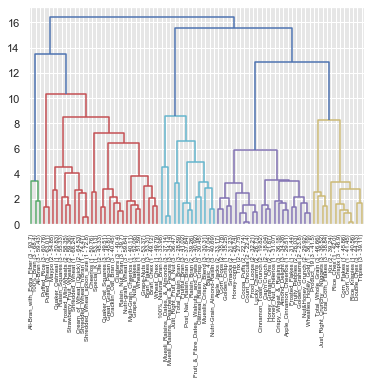

In [30]:
# Using the linkage matrix build the Dendrogram.
dendrogram(linkage_matrix,labels=cereals_label.values)

In [31]:
# Apply Hierarchal clustering on the Cereals data
agg_clust = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
agg_clusters = agg_clust.fit_predict(scaled_data)
agg_result = pd.DataFrame({"label":cereals_label,"agg_cluster":agg_clusters}).sort_values('agg_cluster')
agg_result


,label,agg_cluster
49,Nutri-Grain_Almond-Raisin (3 - 40.69),0
1,100%_Natural_Bran (3 - 33.98),0
46,Mueslix_Crispy_Blend (3 - 30.31),0
45,"Muesli_Raisins,_Peaches,_&_Pecans (3 - 34.14)",0
44,"Muesli_Raisins,_Dates,_&_Almonds (3 - 37.14)",0
...,...,...
37,Honey-comb (1 - 28.74),4
48,Nut&Honey_Crunch (2 - 29.92),4
76,Wheaties_Honey_Gold (1 - 36.19),4
55,Puffed_Wheat (3 - 63.01),5
